<a href="https://colab.research.google.com/github/dp1706/Machine-Learning/blob/master/Assignment%209/ML_Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h4><center>-- Assignment 9 --</center><h4>

### Module

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### DataSet

In [ ]:
dataset = load_iris()
dataset.filename

'/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv'

In [ ]:
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
Y = pd.DataFrame(dataset.target,columns=['Class'])
Y.tail()

,Class
145,2
146,2
147,2
148,2
149,2


In [ ]:
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
Y.isna().sum()

Class    0
dtype: int64

### Part 1

#### Creating Linearly Separable Dataset

In [ ]:
New_X = pd.DataFrame(X.iloc[50:150,2:4].values , columns=dataset.feature_names[2:])
New_X.head()

,petal length (cm),petal width (cm)
0,4.7,1.4
1,4.5,1.5
2,4.9,1.5
3,4.0,1.3
4,4.6,1.5


In [ ]:
New_Y = pd.DataFrame(Y.iloc[50:150,:].values,columns=['Class'])
New_Y.head()

,Class
0,1
1,1
2,1
3,1
4,1


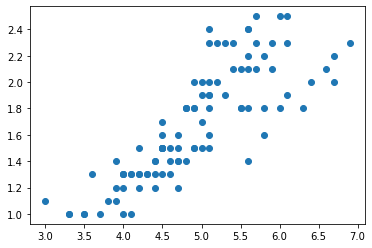

In [ ]:
plt.scatter(New_X.iloc[:,0:1],New_X.iloc[:,1:2])
plt.show()

In [ ]:
sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(New_X),columns=dataset.feature_names[2:])
Xs.head()

,petal length (cm),petal width (cm)
0,-0.250779,-0.653039
1,-0.494254,-0.416431
2,-0.007304,-0.416431
3,-1.102941,-0.889647
4,-0.372516,-0.416431


#### Classification Using SVM

In [ ]:
x_train , x_test , y_train , y_test  = train_test_split(Xs,New_Y,test_size=0.2,random_state=1)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(80, 2) (20, 2)
(80, 1) (20, 1)


In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(C=10000,kernel='linear')
model.fit(x_train,y_train)

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
train_score = model.score(x_train,y_train)
print("Accuracy for Training in Support Vector Machine is :  {:0.2f}% ".format(train_score*100))

test_score = model.score(x_test,y_test)
print("Accuracy for Testing in Support Vector Machine is :  {:0.2f}% ".format(test_score*100))

Accuracy for Training in Support Vector Machine is :  97.50% 
Accuracy for Testing in Support Vector Machine is :  90.00% 


In [ ]:
SVC_pred = model.predict(x_test)

[[ 7  1]
 [ 1 11]]


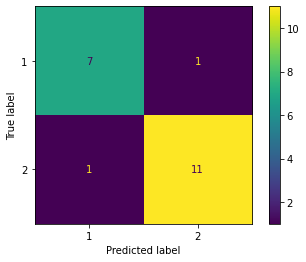

In [ ]:
model_matrix = confusion_matrix(y_test,SVC_pred)
plot_confusion_matrix(model,x_test,y_test)
print(model_matrix)

In [ ]:
model_report = classification_report(y_test,SVC_pred)
print(model_report)

              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        12

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [ ]:
SVC_Whole_pred = model.predict(Xs)

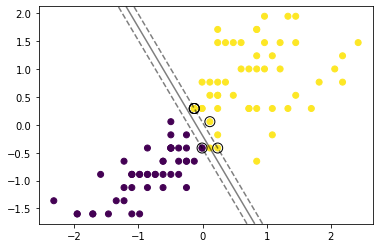

In [ ]:
#plotting

plt.scatter(Xs.iloc[:,0:1],Xs.iloc[:,1:2],c=SVC_Whole_pred)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [ ]:
print('w = ',model.coef_)
print('b = ',model.intercept_)
print('Indices of support vectors = ', model.support_)
print('Support vectors = ', model.support_vectors_)
print('Number of support vectors for each class = ', model.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(model.dual_coef_))

w =  [[8.21139697 4.22486162]]
b =  [0.81988041]
Indices of support vectors =  [ 7 51 64 14 24 69]
Support vectors =  [[ 0.11443316  0.05678601]
 [-0.00730424 -0.41643072]
 [-0.12904165  0.29339437]
 [-0.12904165  0.29339437]
 [ 0.23617057 -0.41643072]
 [-0.12904165  0.29339437]]
Number of support vectors for each class =  [3 3]
Coefficients of the support vector in the decision function =  [[10000.          5042.65382114 10000.          6672.61864223
   8370.03517891 10000.        ]]


#### 5-Fold cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score , KFold ,  cross_val_predict

In [ ]:
scores = cross_val_score(model,Xs,New_Y,cv=KFold(n_splits=5))
scores

array([1.  , 0.85, 0.95, 0.9 , 0.9 ])

In [ ]:
print("Average Accuracy Is: {:.2f}% ".format(np.mean(scores) * 100))

Average Accuracy Is: 92.00% 


* Class Wise Accuracy

In [ ]:
cross_pred = cross_val_predict(model,Xs,New_Y,cv=KFold(n_splits=5))

In [ ]:
print(classification_report(New_Y,cross_pred))

              precision    recall  f1-score   support

           1       0.90      0.94      0.92        50
           2       0.94      0.90      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



### Part 2

#### Data Preprocessing

In [ ]:
sc = StandardScaler()
Xr = pd.DataFrame(sc.fit_transform(X),columns=dataset.feature_names)
Xr.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(Xr,Y,test_size=0.3,random_state=0)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(105, 4) (45, 4)
(105, 1) (45, 1)


#### Model And Accuracy

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [ ]:
def find_cent(x):
  K_cent= 10
  km= KMeans(n_clusters= K_cent, max_iter= 100)
  km.fit(x)
  cent= km.cluster_centers_
  #print(cent)
  return K_cent , cent

* determine value of $\sigma$

In [ ]:
def calculate_sigma(K_cent,cent):
  max=0 
  for i in range(K_cent):
	  for j in range(K_cent):
		  d= np.linalg.norm(cent[i]-cent[j])
		  if(d> max):
			  max= d
  d= max
  sigma= d/np.sqrt(2*K_cent)
  return sigma

In [ ]:
def Setup_Mat(x,K_cent,cent,sigma):
  row= x.shape[0]
  column= K_cent
  G= np.empty((row,column), dtype= float)
  for i in range(row):
      for j in range(column):
          dist= np.linalg.norm(x[i]-cent[j])
          G[i][j]= np.exp(-pow(dist,2)/pow(2*sigma,2))
  return G

In [ ]:
def predict(x):
    K_cent ,  cent = find_cent(x)
    sigma = calculate_sigma(K_cent , cent)
    G_test = Setup_Mat(x,K_cent,cent,sigma)
    pred = np.dot(G_test,W)
    pred = 0.5*(np.sign(pred-0.5)+1)
    return pred

In [ ]:
def Train_Model(x,y):

  K_cent ,  cent = find_cent(x)
  sigma = calculate_sigma(K_cent , cent)
  G = Setup_Mat(x,K_cent,cent,sigma)
  GTG= np.dot(G.T,G)
  GTG_inv= np.linalg.inv(GTG)
  fac= np.dot(GTG_inv,G.T)
  W= np.dot(fac,y)
  return W

In [ ]:
w = Train_Model(X_train,Y_train)

Train_pred = predict(X_train)
test_pred = predict(X_test)

test_Acc = accuracy_score(Y_test,test_pred)
train_Acc = accuracy_score(Y_train,Train_pred)

print("Training accuracy is : {:.2f}%".format(train_Acc*100))
print("Testing accuracy is : {:.2f}%".format(test_Acc*100))

Training accuracy is : 62.86%
Testing accuracy is : 68.89%


In [ ]:
Overall_pred = predict(X.to_numpy())
Overall_acc = accuracy_score(Y.to_numpy(),Overall_pred)
print("Overall Accuracy is : {:.2f}%".format(Overall_acc * 100))

Overall Accuracy is : 66.67%


* __ClassWise and Average Accuracy__

In [ ]:
print(classification_report(Y.to_numpy(),Overall_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.50      1.00      0.67        50
           2       0.00      0.00      0.00        50

    accuracy                           0.67       150
   macro avg       0.50      0.67      0.56       150
weighted avg       0.50      0.67      0.56       150

